# 1. 多项式回归

# 3. 过拟合和欠拟合

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(666)
x = np.random.uniform(-3.0,3.0,size =100)
X = x.reshape(-1,1)
y = 0.5*x**2+x+2+np.random.normal(0,1,size = 100)

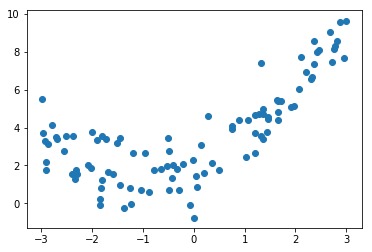

In [4]:
plt.scatter(X,y)

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.4953707811865009

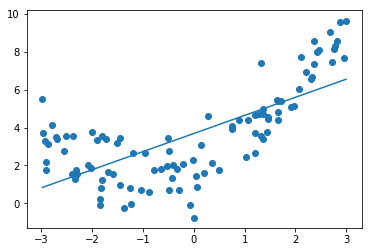

In [7]:
y_predict = lin_reg.predict(X)
plt.scatter(X,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)])

In [11]:
from sklearn.metrics import mean_squared_error
y_predict = lin_reg.predict(X)
mean_squared_error(y,y_predict)

3.0750025765636577

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
def PolynomialRegression(degree):
    return Pipeline([
        ('Poly',PolynomialFeatures(degree=degree)),
        ('std_scaler',StandardScaler()),
        ('lin_reg',LinearRegression())
    ])

In [19]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(X,y)
y2_predict = poly2_reg.predict(X)
mean_squared_error(y,y2_predict)

1.0987392142417858

In [17]:
y2_predict = poly2_reg.predict(X)
mean_squared_error(y,y2_predict)

1.0987392142417858

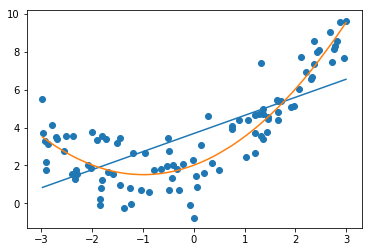

In [18]:
y_predict = lin_reg.predict(X)
plt.scatter(X,y)
plt.plot(np.sort(x),y_predict[np.argsort(x)])
plt.plot(np.sort(x),y2_predict[np.argsort(x)])

1.0508466763764126


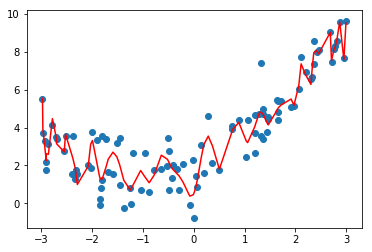

In [38]:
poly100_reg = PolynomialRegression(degree=100)
poly100_reg.fit(X,y)
y100_predict = poly100_reg.predict(X)
print(mean_squared_error(y,y2_predict))
y_predict = lin_reg.predict(X)
plt.scatter(X,y)
plt.plot(np.sort(x),y100_predict[np.argsort(x)],color = 'r')

[-3, 3, -10, 10]

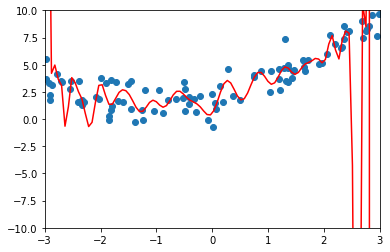

In [40]:
x_plot = np.linspace(-3,3,100).reshape(100,-1)
y_plot = poly100_reg.predict(x_plot)
plt.scatter(x,y)
plt.plot(x_plot,y_plot,color = 'r')
plt.axis([-3,3,-10,10])

In [52]:
from sklearn.model_selection import train_test_split
x_trian,x_test,y_train,y_test = train_test_split(X,y)

In [53]:
lin_reg = LinearRegression()

In [55]:
lin_reg.fit(x_trian,y_train)
y_predict = lin_reg.predict(x_test)

In [56]:
mean_squared_error(y_test,y_predict)

2.4307570776778507

In [58]:
poly2_reg = PolynomialRegression(degree=2)
poly2_reg.fit(x_trian,y_train)
y2_predict = poly2_reg.predict(x_test)
mean_squared_error(y_test,y2_predict)

1.0783307946647305

In [63]:
poly2_reg = PolynomialRegression(degree=3)
poly2_reg.fit(x_trian,y_train)
y2_predict = poly2_reg.predict(x_test)
mean_squared_error(y_test,y2_predict)

1.0683901506915818

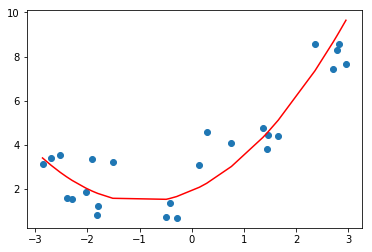

In [128]:
plt.scatter(x_test,y_test)
plt.plot(np.sort(x_test,0),y2_predict[np.argsort(x_test,0)],color = 'r')

# 4 学习曲线

In [185]:
np.random.seed(666)
x = np.random.uniform(-3.0,3.0,size =100)
X = x.reshape(-1,1)
y = 0.5*x**2+x+2+np.random.normal(0,1,size = 100)
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 10)

In [186]:
x_trian.shape
y_train.shape

(75,)

In [193]:
def plot_learning_curve(algo,x_train,x_test,y_train,y_test):
    train_score =[]
    test_score =[]
    for i in range(1,76):
        lin_reg = algo
        lin_reg.fit(x_trian[:i],y_train[:i])
        y_trian_predict = lin_reg.predict(x_trian[:i])
        train_score.append(mean_squared_error(y_train[:i],y_trian_predict))
        y_test_predict = lin_reg.predict(x_test)
        test_score.append(mean_squared_error(y_test,y_test_predict))
    plt.plot(range(1,76),train_score,label = 'train')
    plt.plot(range(1,76),test_score,label = 'test')
    plt.axis([0,len(x_train)+1,0,10])
    plt.legend()

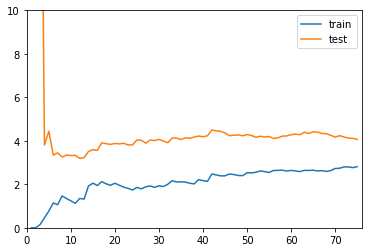

In [194]:
plot_learning_curve(LinearRegression(),x_train,x_test,y_train,y_test)

In [196]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def PolynomialRegress(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=2)),
        ('std_scale',StandardScaler()),
        ('lin_reg',LinearRegression())
    ])

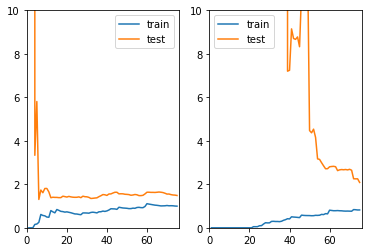

In [205]:
plt.subplot(1,2,1)
poly2_reg = PolynomialRegression(degree=2)
plot_learning_curve(poly2_reg,x_train,x_test,y_train,y_test)
plt.subplot(1,2,2)
poly2_reg = PolynomialRegression(degree=20)
plot_learning_curve(poly2_reg,x_train,x_test,y_train,y_test)

# 8. 模型泛化和岭回归

### 模型正则化

In [124]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(666)
x = np.random.uniform(-3.0,3.0,size =100)
X = x.reshape(-1,1)
y = 0.5*x*2+5+np.random.normal(0,1,size = 100)

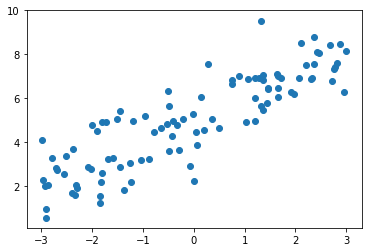

In [125]:
plt.scatter(x,y)

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def PolynomialRegress(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree = degree)),
        ('std_scale',StandardScaler()),
        ('lin_reg',LinearRegression())
    ])

In [127]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state = 10)

In [130]:
poly_reg = PolynomialRegress(degree=20)
poly_reg.fit(x_train,y_train)
y_poly_predicted = poly_reg.predict(x_test)
mean_squared_error(y_test,y_poly_predicted)

2.08648992373573

In [131]:
def plot_model(model):
    x_plot = np.linspace(-3,3,100).reshape(100,1)
    y_plot = model.predict(x_plot)
    plt.scatter(x,y)
    plt.plot(x_plot,y_plot,'r')

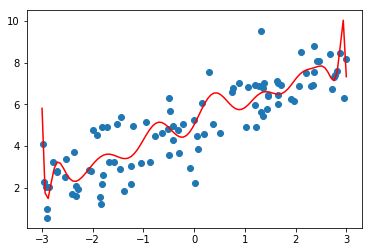

In [132]:
 plot_model(poly_reg)

###  岭回归

In [133]:
from sklearn.linear_model import Ridge
def RidgeRegress(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree = degree)),
        ('std_scale',StandardScaler()),
        ('ridge_reg',Ridge(alpha =alpha))
    ])

In [134]:
ridge1_reg = RidgeRegress(degree=20,alpha= 0.0001)

2.08648992373573


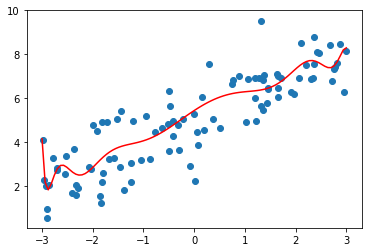

In [135]:
ridge1_reg.fit(x_train,y_train)
y_poly_predicted = poly_reg.predict(x_test)
print(mean_squared_error(y_test,y_poly_predicted))
plot_model(ridge1_reg)

2.08648992373573


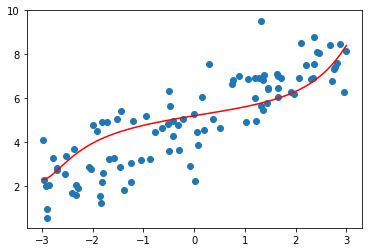

In [136]:
ridge1_reg = RidgeRegress(degree=20,alpha= 50)
ridge1_reg.fit(x_train,y_train)
y_poly_predicted = poly_reg.predict(x_test)
print(mean_squared_error(y_test,y_poly_predicted))
plot_model(ridge1_reg)

## LASSO 回归

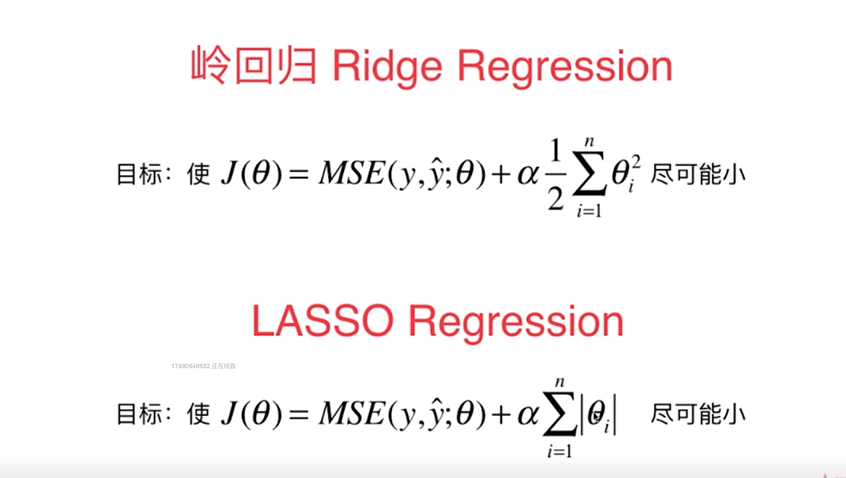

In [150]:
from sklearn.linear_model import Lasso
def RidgeRegress(degree,alpha):
    return Pipeline([
        ('poly',PolynomialFeatures(degree = degree)),
        ('std_scale',StandardScaler()),
        ('Lasso_reg',Lasso(alpha =alpha))
    ])

1.5138679484605524
1.485666156372127
4.363382713389774
4.363382713389774


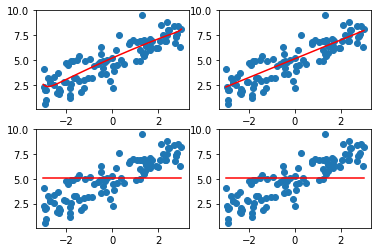

In [170]:
j =1
for i in (0.01,0.1,10,100):
    Lasso_reg = RidgeRegress(degree=20,alpha = i)
    Lasso_reg.fit(x_train,y_train)
    y_poly_predicted = Lasso_reg.predict(x_test)
    print(mean_squared_error(y_test,y_poly_predicted))
    plt.subplot(2,2,j)
    j = j+1
    plot_model(Lasso_reg)

## 使某些 系数为0
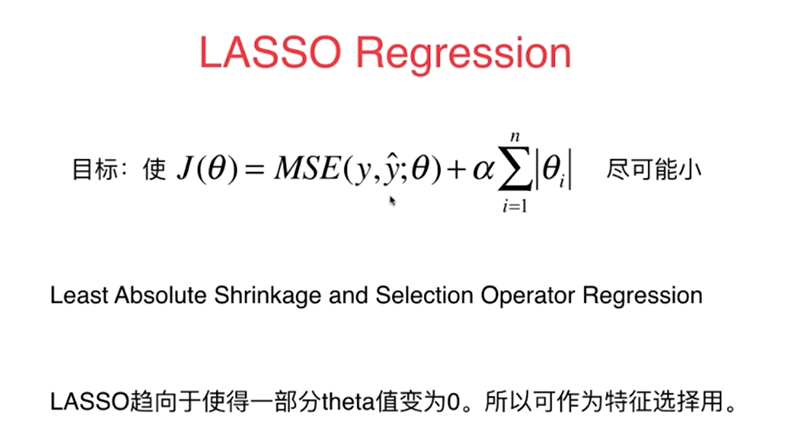

## L1,L2和弹性网络

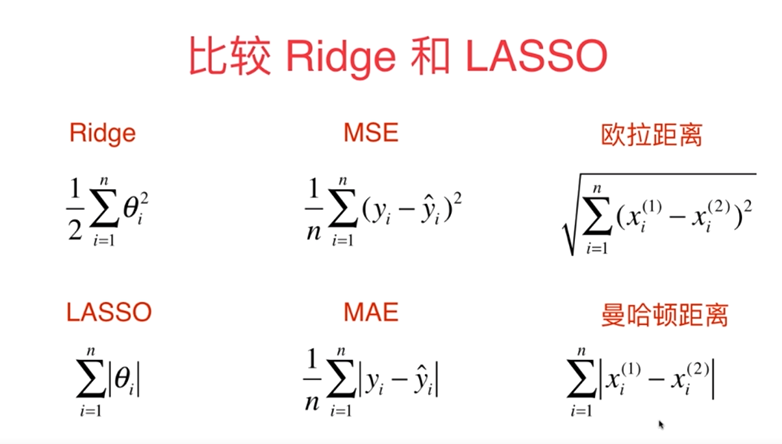

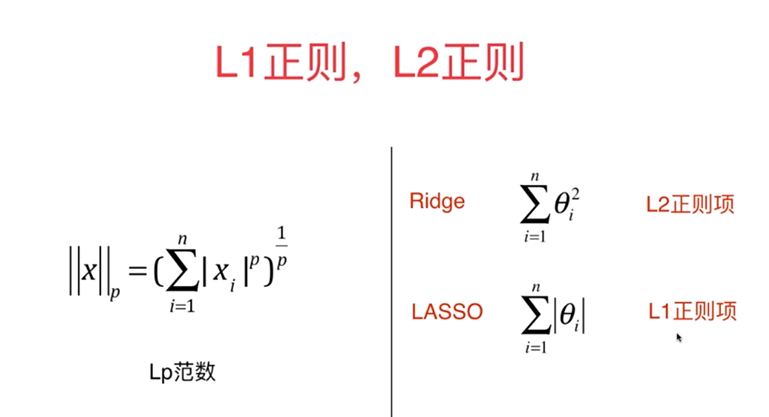

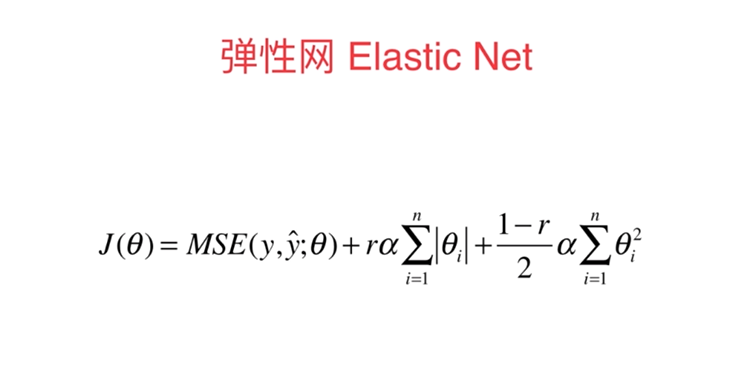